In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('headbrain.csv')

In [5]:
dataset.shape

(237, 4)

In [6]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
X = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

In [8]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [9]:
numer = 0
denom = 0

for i in range(len(X)):
    numer += (mean_x - X[i]) * (mean_y - y[i])
    denom += (mean_x - X[i]) ** 2
    
slope = numer/denom
intercept = mean_y - slope * mean_x

In [10]:
print(slope, intercept)

0.26342933948939945 325.57342104944223


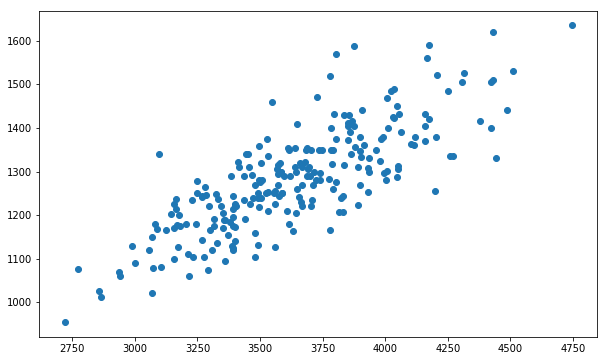

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)

In [12]:
predictions = []
for i in range(len(X)):
    pred = slope * X[i] + intercept
    predictions.append(pred)


In [13]:
for i in range(10):
    print("Actual : {}, Predicted : {}".format(y[i], predictions[i]))

Actual : 1530, Predicted : 1514.1666008256125
Actual : 1297, Predicted : 1310.2722920608173
Actual : 1335, Predicted : 1448.0458366137732
Actual : 1282, Predicted : 1320.546036300904
Actual : 1590, Predicted : 1425.9177720966638
Actual : 1300, Predicted : 1269.9676031189392
Actual : 1400, Predicted : 1322.6534710168191
Actual : 1255, Predicted : 1263.118440292215
Actual : 1355, Predicted : 1277.3436246246424
Actual : 1375, Predicted : 1374.549050896231


In [14]:
err = 0
n = len(y)
for i in range(n):
    err += (predictions[i] - y[i]) ** 2
mse = err/n
rmse = np.sqrt(mse)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)

Mean Squared Error 5201.38402800233
Root Mean Squared Error 72.1206213783709


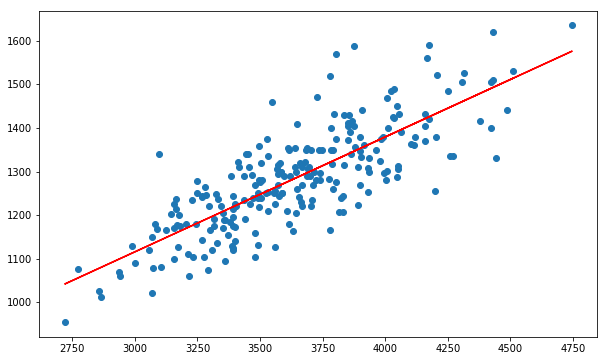

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()
X = sc.fit_transform(X.reshape(-1,1))
y = sc.fit_transform(y.reshape(-1,1))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
X[:10]

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182]])

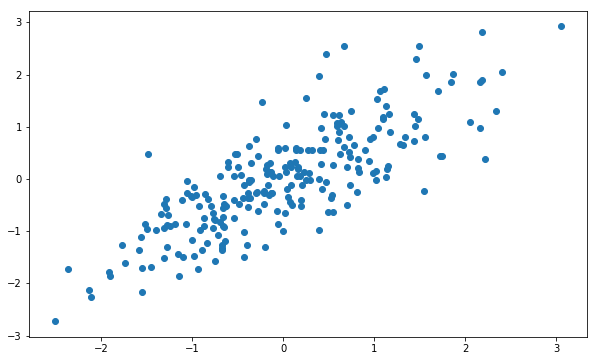

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)

In [35]:
def gradient_descent(epochs,alpha):
    slope = 0
    intercept = 0
    for i in range(epochs):
        y_pred = slope * X + intercept
        loss = y_pred - y
        intercept_grad = (2/n) * sum(loss)
        slope_grad = (2/n) * sum(loss* X)
        slope = slope - alpha * slope_grad
        intercept = intercept - alpha * intercept_grad
#         print(intercept,slope)
    return slope,intercept

In [36]:
slope, intercept = gradient_descent(5000,0.001)
print("Slope is",slope)
print("Intercept is",intercept)

Slope is [0.79953377]
Intercept is [-3.32622818e-16]


In [37]:
predictions = slope * X + intercept

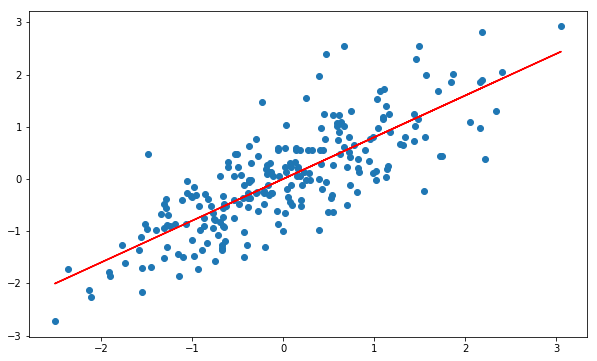

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')

In [40]:
err = 0
n = len(y)
for i in range(n):
    err += (predictions[i] - y[i]) ** 2
mse = err/n
print("Mean Squared Error",mse)

Mean Squared Error [0.36068828]


In [50]:
slope, intercept = 0.26342933948939945 ,325.57342104944223
headSize = 4000

In [51]:
ypred = slope * headSize + intercept

In [52]:
ypred

1379.29077900704